# Quantum Teleportation

#### Alice and Bob are far apart. They each have 1 electron (qubit). Their qubits share the entangled state $ \frac{1}{\sqrt{2}} \ket{00} + \frac{1}{\sqrt{2}} \ket{11} $. Alice has an additional qubit $(a \ket{0} + b \ket{1})$ that she want to send Bob. We assume here that the qubit that Alice want to send is $ \ket{1} $, and as Qiskit initial value for every qubit is $ \ket{0} $, we apply X gate to the teleport qubit to flip it to $ \ket{1} $. We apply the Bell circuit to the other 2 qubits to get the entangled state. The 3 qubits can be written mathematically as:

\begin{aligned}
a \ket{0} + b \ket{1} \otimes (\frac{1}{\sqrt{2}} \ket{00} + \frac{1}{\sqrt{2}} \ket{11}) = \frac{a}{\sqrt{2}} \ket{000} + \frac{a}{\sqrt{2}} \ket{011} + \frac{b}{\sqrt{2}} \ket{100} + \frac{b}{\sqrt{2}} \ket{111}
\end{aligned}

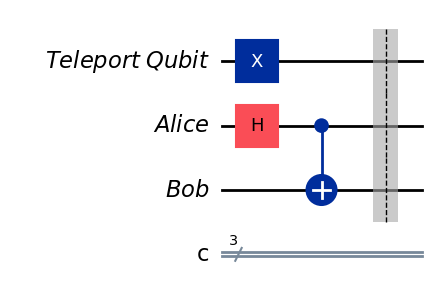

In [26]:
from qiskit import QuantumCircuit, QuantumRegister

teleport_qubit = QuantumRegister(1, 'Teleport Qubit')
alice = QuantumRegister(1, 'Alice') 
bob = QuantumRegister(1, 'Bob') 

qc = QuantumCircuit(0, 3) 
qc.add_register(teleport_qubit, alice, bob) 
qc.x(0)
qc.h(1) 
qc.cx(1, 2)
qc.barrier()
qc.draw('mpl')

#### Apply CNOT and Hadamard gate to the 1st qubit we get:

\begin{aligned}
& \frac{a}{2} \ket{000} + \frac{a}{2} \ket{011} + \frac{a}{2} \ket{100} + \frac{a}{2} \ket{111} + \frac{b}{2} \ket{010} + \frac{b}{2} \ket{001} - \frac{b}{2} \ket{110} - \frac{b}{2} \ket{101} & \\
 =  & \frac{1}{2} \ket{00} \otimes (a \ket{0} + b \ket{1}) + \frac{1}{2} \ket{01} \otimes (a \ket{1} + b \ket{0}) + \frac{1}{2} \ket{10} \otimes (a \ket{0} - b \ket{1}) + \frac{1}{2} \otimes (a \ket{1} - b \ket{0})
\end{aligned}

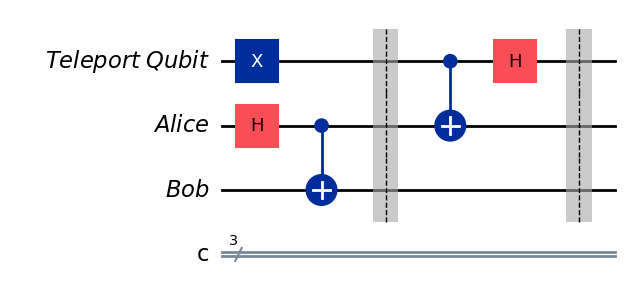

In [20]:
qc.cx(0, 1) 
qc.h(0)
qc.barrier()
qc.draw('mpl')

#### When Alice measure her 2 qubits, she will get either $ (\ket{00}, \ket{01}, \ket{10}, \ket{11}) $ with equal probability $\frac{1}{4}$. If she gets:

- $ \ket{00} $, Bob's qubit will jump to state $ a \ket{0} + b \ket{1} $
- $ \ket{01} $, Bob's qubit will jump to state $ a \ket{1} + b \ket{0} $
- $ \ket{10} $, Bob's qubit will jump to state $ a \ket{0} - b \ket{1} $
- $ \ket{11} $, Bob's qubit will jump to state $ a \ket{1} - b \ket{0} $

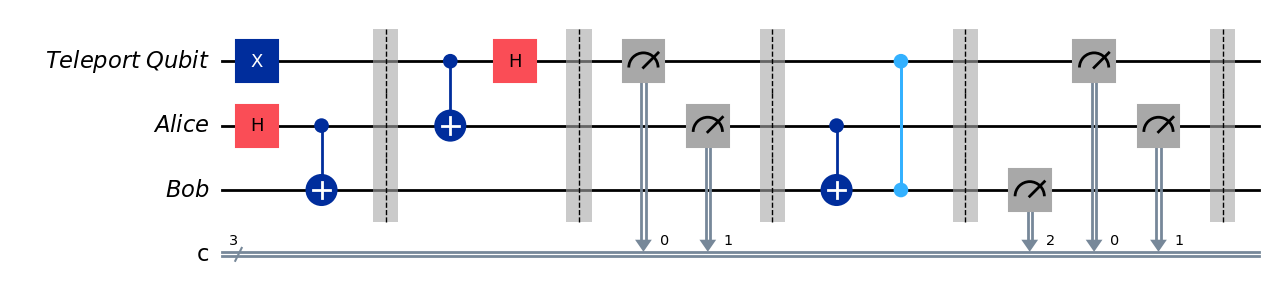

In [24]:
qc.measure([0, 1], [0, 1]) 
qc.barrier()
qc.draw('mpl')

#### However, Alice want Bob's qubit to be in state $ a \ket{0} + b \ket{1} $, but it's not there yet. She will need to send Bob the 2 classical bits from her measurements to let him know about the situation. If Bob gets:

- $00$, he knows his qubit is in the right state and doesn't need to do anything
- $01$, his qubit is now in state $ a \ket{1} + b \ket{0} $. Applying the X gate would give the desired result
- $10$, his qubit is now in state $ a \ket{0} - b \ket{1} $. Applying the Z gate would give the desired result
- $11$, his qubit is not in state $ a \ket{1} - b \ket{0} $. Applying the XZ gate would give the desired result

#### We can do this by using the CX and CZ gate:

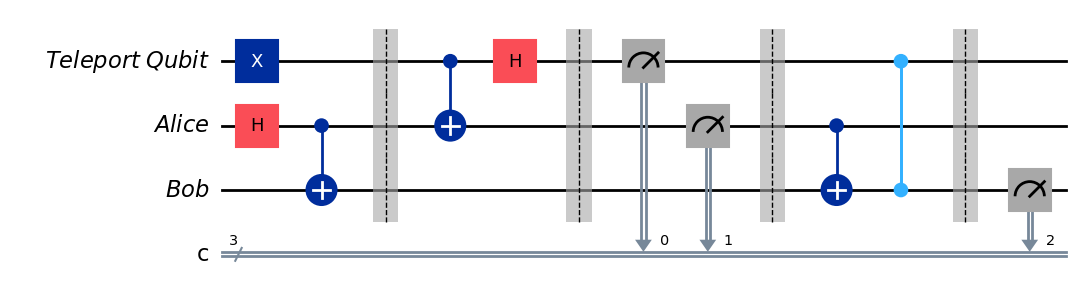

In [21]:
qc.cx(1, 2)
qc.cz(0, 2)
qc.barrier() 

qc.measure(2, 2) 
qc.draw('mpl')

#### Qiskit gives the result in reverse order $ c_2 c_1 c_0 $, and in every case we get $1$ for $c_2$

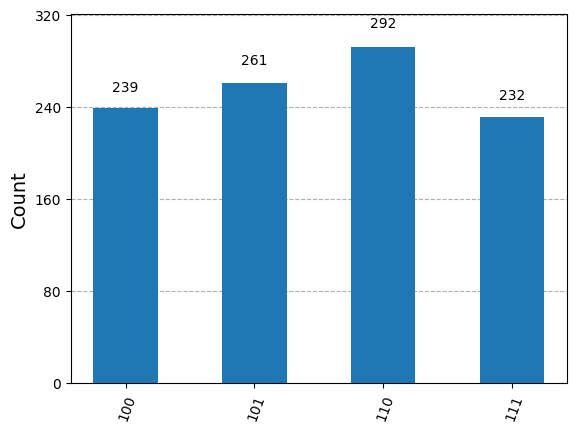

In [22]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

simulator = AerSimulator()
transpiled_qc = transpile(qc, simulator)
result = simulator.run(transpiled_qc).result()
counts = result.get_counts(transpiled_qc)
plot_histogram(counts)